## Loading Dependencies

In [5]:
import pandas as pd

## Loading Data

In [6]:
data = {'95m': 'https://drive.google.com/file/d/1ukYfAD9sdDNfw9lz4CocN5Gk7C7SCeCy/view?usp=drive_link',
        '206m': 'https://drive.google.com/file/d/1sYU22Cw3DG7wycjYQw12mSBf5DThFwob/view?usp=drive_link',
        '310m': 'https://drive.google.com/file/d/1sIwCPblFYbBPIPE7sWFwoJDzrnvl_-J3/view?usp=drive_link'
        }

In [7]:
url_95 = 'https://drive.google.com/file/d/1ukYfAD9sdDNfw9lz4CocN5Gk7C7SCeCy/view?usp=drive_link'
url_95_id = 'https://drive.google.com/uc?id=' + url_95.split('/')[-2]

#url_206 = 'https://drive.google.com/file/d/1sYU22Cw3DG7wycjYQw12mSBf5DThFwob/view?usp=drive_link'
#url_206_id = 'https://drive.google.com/uc?id=' + url_206.split('/')[-2]

url_310 = 'https://drive.google.com/file/d/1sIwCPblFYbBPIPE7sWFwoJDzrnvl_-J3/view?usp=drive_link'
url_310_id = 'https://drive.google.com/uc?id=' + url_310.split('/')[-2]


In [88]:
df_95 = pd.read_csv(url_95_id)
df_310 = pd.read_csv(url_310_id)

In [89]:
df_95_clean_1 = df_95.drop(columns=['ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)'])
df_310_clean_1 = df_310.drop(columns=['ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)'])

In [90]:
# Convert 'Timestamp' column to datetime
df_95_clean_1['Timestamp'] = pd.to_datetime(df_95_clean_1['Timestamp'])
df_310_clean_1['Timestamp'] = pd.to_datetime(df_310_clean_1['Timestamp'])


# Verify the changes
print(df_95_clean_1.info())
print(df_310_clean_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5717 entries, 0 to 5716
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 5717 non-null   datetime64[ns]
 1   accelX(g)                 5717 non-null   float64       
 2   accelY(g)                 5717 non-null   float64       
 3   accelZ(g)                 5717 non-null   float64       
 4   accelUserX(g)             5717 non-null   float64       
 5   accelUserY(g)             5717 non-null   float64       
 6   accelUserZ(g)             5717 non-null   float64       
 7   gyroX(rad/s)              5717 non-null   float64       
 8   gyroY(rad/s)              5717 non-null   float64       
 9   gyroZ(rad/s)              5717 non-null   float64       
 10  m11                       5717 non-null   float64       
 11  m12                       5717 non-null   float64       
 12  m13                 

#df_95_clean_1

In [91]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [133]:
# Select relevant features
features_1 = ['Speed(m/s)', 'Course']
X_1 = df_95_clean_1[features_1]

5


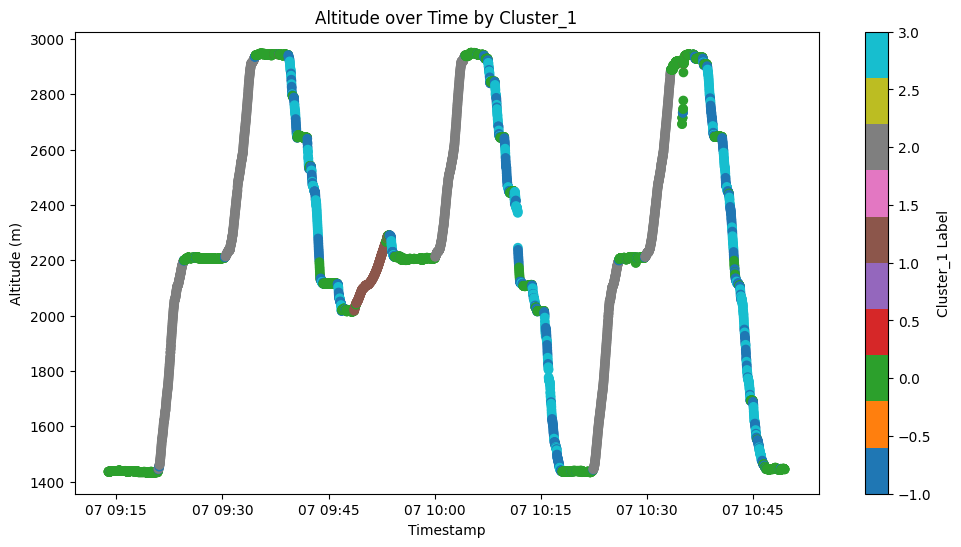

In [180]:
# Pipeline for scaling and clustering
pipeline_dbscan_95 = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(
        eps=0.15,
        min_samples=70,
        metric = 'haversine'
        ))
])

# Fit the pipeline
clusters_95 = pipeline_dbscan_95.fit_predict(X_1)

# Add the cluster labels to your dataframe
df_95_clean_1['Cluster_1'] = clusters_95

print(df_95_clean_1['Cluster_1'].nunique())

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot for Altitude over Time
plt.figure(figsize=(12, 6))
plt.scatter(df_95_clean_1['Timestamp'],
            df_95_clean_1['Alt(m)'],
            c=df_95_clean_1['Cluster_1'],
            cmap='tab10',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.colorbar(label='Cluster_1 Label')
plt.show()

In [181]:
print(df_95_clean_1['Cluster_1'].unique())


[ 0 -1  1  2  3]


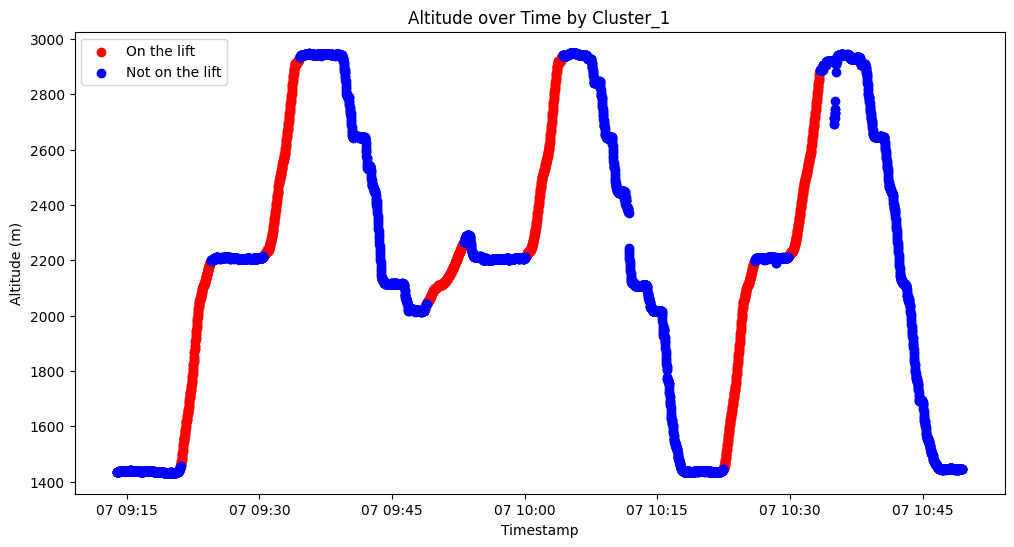

In [182]:
lift_clusters = [1,2]

lift_ride_condition = df_95_clean_1['Cluster_1'].isin(lift_clusters)
other_condition = ~lift_ride_condition

plt.figure(figsize=(12, 6))

# Plot lift rides with one color
plt.scatter(df_95_clean_1.loc[lift_ride_condition, 'Timestamp'],
            df_95_clean_1.loc[lift_ride_condition, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot other clusters with another color
plt.scatter(df_95_clean_1.loc[other_condition, 'Timestamp'],
            df_95_clean_1.loc[other_condition, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()


#df_310

In [99]:
# Select relevant features
features_310 = ['Speed(m/s)', 'Course']

X_310 = df_310_clean_1[features_310]

3


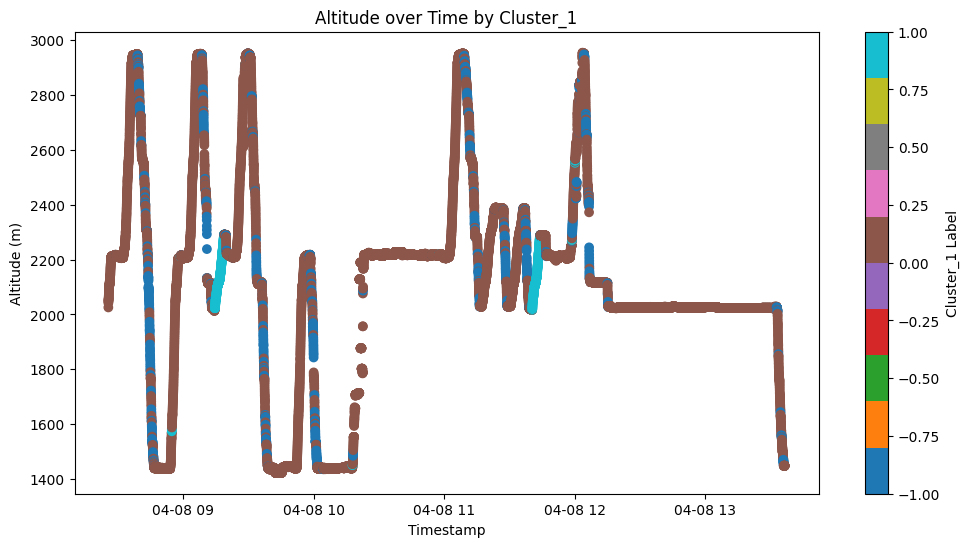

In [166]:
# Pipeline for scaling and clustering
pipeline_dbscan_310 = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(
        eps=0.15,
        min_samples=70,
        metric = 'haversine'
        ))
])


# Fit the pipeline
clusters_310 = pipeline_dbscan_310.fit_predict(X_310)

# Add the cluster labels to your dataframe
df_310_clean_1['Cluster_1'] = clusters_310

print(df_310_clean_1['Cluster_1'].nunique())

# Plot for Altitude over Time
plt.figure(figsize=(12, 6))
plt.scatter(df_310_clean_1['Timestamp'],
            df_310_clean_1['Alt(m)'],
            c=df_310_clean_1['Cluster_1'],
            cmap='tab10',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.colorbar(label='Cluster_1 Label')
plt.show()

In [164]:
print(df_310_clean_1['Cluster_1'].unique())

[ 0 -1  1]


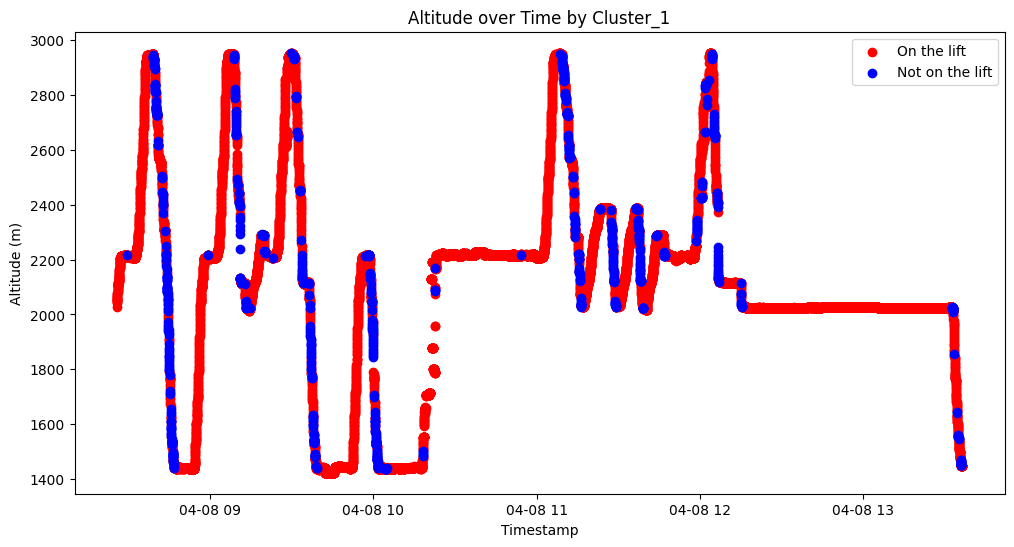

In [178]:
lift_clusters = [0,1]

lift_ride_condition = df_310_clean_1['Cluster_1'].isin(lift_clusters)
other_condition = ~lift_ride_condition

plt.figure(figsize=(12, 6))

# Plot lift rides with one color
plt.scatter(df_310_clean_1.loc[lift_ride_condition, 'Timestamp'],
            df_310_clean_1.loc[lift_ride_condition, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot other clusters with another color
plt.scatter(df_310_clean_1.loc[other_condition, 'Timestamp'],
            df_310_clean_1.loc[other_condition, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()


# Feature engineering

##Rate of Altitude Change and Variance in Speed



Calculate the difference in altitude between consecutive data points.

Calculate the variance of speed within a rolling window. Lift rides should have a lower variance compared to skiing or snowboarding.


You may also compute the standard deviation of speed as it will give you a sense of the dispersion of the speed values around the mean.

In [257]:
df=df_95_clean_1
# df=df_310_clean_1

# switch between data frames

In [258]:
# Rate of Altitude Change
df['Altitude_Change'] = df['Alt(m)'].diff().fillna(0)

# Variance in Speed within a rolling window of 10 points
window_size = 2
df['Speed_Variance'] = df['Speed(m/s)'].rolling(window=window_size).var().fillna(0)

6


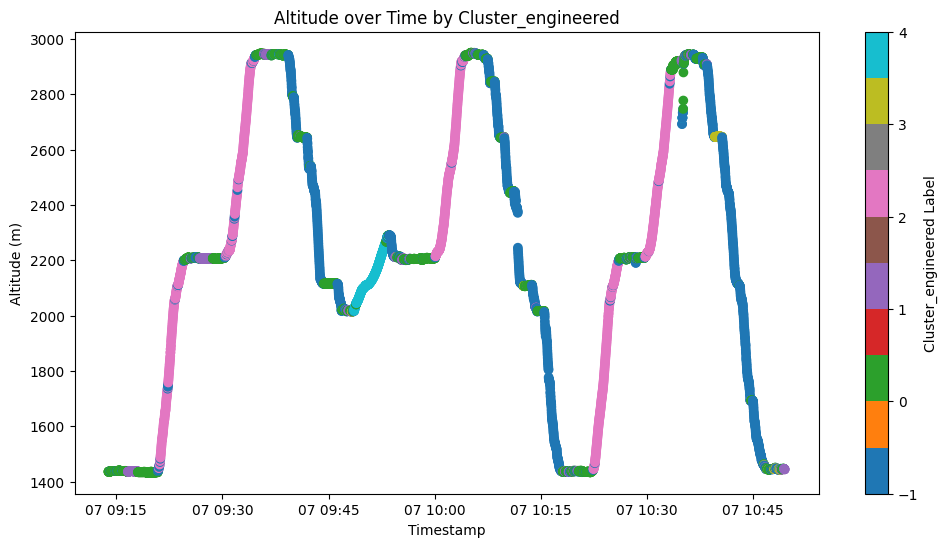

[ 0 -1  1  2  3  4]


In [259]:
# Select relevant features
features_engineered = ['Speed(m/s)', 'Course','Speed_Variance',]
X_1_engineered = df[features_engineered]

# Pipeline for scaling and clustering
pipeline_dbscan_engineered = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(
        eps=0.15,
        min_samples=70,
        ))
])

# Fit the pipeline
clusters_engineered = pipeline_dbscan_engineered.fit_predict(X_1_engineered)

# Add the cluster labels to your dataframe
df['Cluster_engineered'] = clusters_engineered

print(df['Cluster_engineered'].nunique())


# Plot for Altitude over Time
plt.figure(figsize=(12, 6))
plt.scatter(df['Timestamp'],
            df['Alt(m)'],
            c=df['Cluster_engineered'],
            cmap='tab10',
            marker='o')

plt.title('Altitude over Time by Cluster_engineered')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.colorbar(label='Cluster_engineered Label')
plt.show()

print(df['Cluster_engineered'].unique())

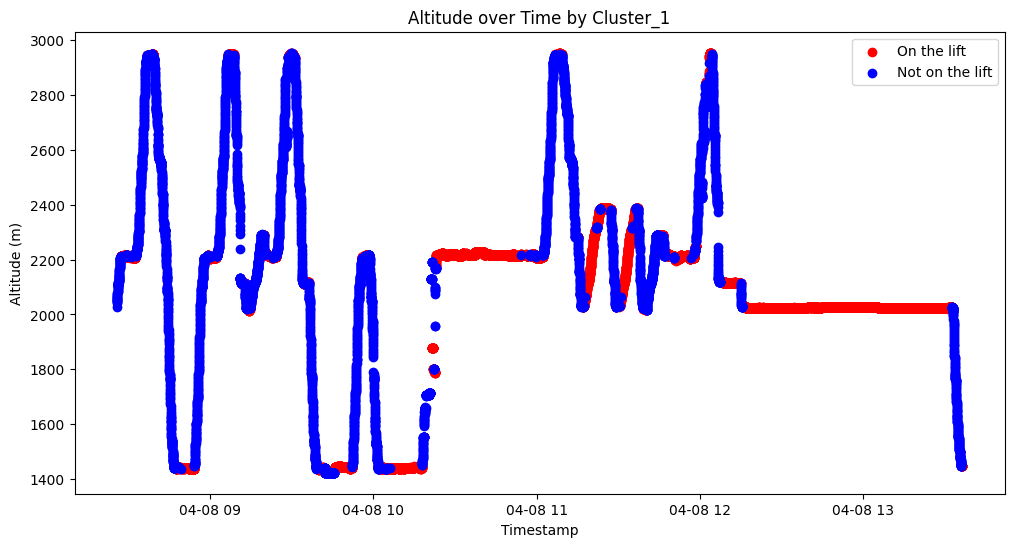

In [241]:
lift_clusters = [1,2,3,4]

lift_ride_condition = df['Cluster_engineered'].isin(lift_clusters)
other_condition = ~lift_ride_condition

plt.figure(figsize=(12, 6))

# Plot lift rides with one color
plt.scatter(df.loc[lift_ride_condition, 'Timestamp'],
            df.loc[lift_ride_condition, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot other clusters with another color
plt.scatter(df.loc[other_condition, 'Timestamp'],
            df.loc[other_condition, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()
